# EDA Find Correlation of Test Score vs 5 diffirent factors

The goal of this project is to find if there is any correlation with the score that students received in three tests to 5 different factors.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

In [2]:
studentparent = pd.read_csv("StudentsPerformance.csv")

In [3]:
studentparent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are thousand students in this dataset with columns:  
1. Gender
2. Race
3. Parental Education Level
4. Lunch that the students had when they took the test on that day
5. Test preparedness
6. Math Scores
7. Reading Scores
8. Writing Scores

In [4]:
studentparent.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Make one more column for Total Score
studentparent['total'] = studentparent['math score'] + studentparent['reading score'] + studentparent['writing score']

## 1.Find which gender receive better test results

In [6]:
group_sex = studentparent.pivot_table(values='total',index='gender')
group_sex

,total
gender,
female,208.708494
male,197.512448


In [7]:
group_sex1 = studentparent.pivot_table(values=('math score','reading score','writing score'),index='gender')
group_sex1

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


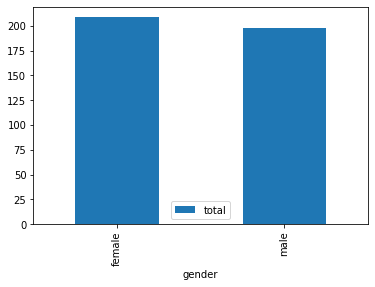

In [8]:
group_sex.plot.bar()

Slight, females received higher overall scores than males.  
Females received higher scores in reading and writing score than male.   
Male received higher score in math than Female

## 2. Find which Race group received higher scores

In [9]:
studentparent['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

There are total of 5 races in this category. Number of group C has the greatest number and D, B, E, and A follow respectively.

In [10]:
group_race = studentparent.pivot_table(values= 'total', index='race/ethnicity')
group_race

,total
race/ethnicity,
group A,188.977528
group B,196.405263
group C,201.394984
group D,207.538168
group E,218.257143


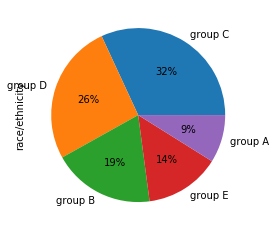

In [11]:
studentparent['race/ethnicity'].value_counts().plot.pie(autopct='%1.0f%%')

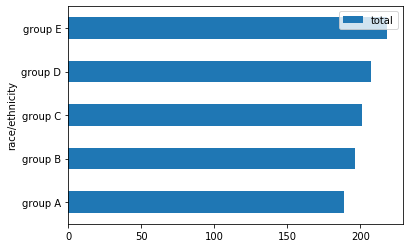

In [12]:
group_race.plot.barh()

Group C is 32% among five races, followed by 26% (Group D), 19% (Group B), 14% Group E (14%), and Group A (9%)

Group E (N = 140) received the highest overall score of 218.6 and Group A ( N= 89) received the lowest overall score of 189.0.

## 3. Find if Parental Education Background suggest higher score for their child

In [13]:
studentparent['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

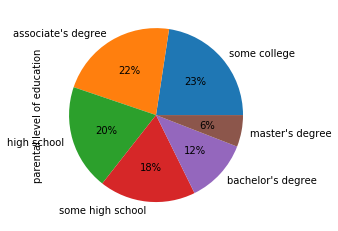

In [14]:
studentparent['parental level of education'].value_counts().plot.pie(autopct='%1.0f%%')

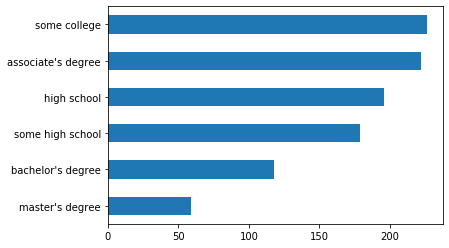

In [15]:
studentparent['parental level of education'].value_counts().sort_values(ascending=True).plot.barh()

Parental level of education ranges from non-high school graduate ('some high school') to master's degree.

We have 23% of parent's last education in 'some college', followed by associate's degree with 22%, high school 20%, some high school 18%, bachelor's degree 12%, and master's degree 6%. As the education level increases, there is decrease in the number of parent's education background. Lower the education, the greater the number of parents associated with their education.

In [16]:
groupedu = studentparent.pivot_table(values=('math score','reading score','writing score'), index= 'parental level of education').reset_index()
groupedu

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


In [17]:
groupedu['total'] = groupedu['math score'] + groupedu['reading score'] + groupedu['writing score']

In [18]:
groupedu.sort_values(by='total', ascending=False).reset_index(drop=True)

,parental level of education,math score,reading score,writing score,total
0,master's degree,69.745763,75.372881,75.677966,220.796610
1,bachelor's degree,69.389831,73.000000,73.381356,215.771186
2,associate's degree,67.882883,70.927928,69.896396,208.707207
3,some college,67.128319,69.460177,68.840708,205.429204
4,some high school,63.497207,66.938547,64.888268,195.324022
5,high school,62.137755,64.704082,62.448980,189.290816


The result shows that the higher education the child's parents have, the higher score their child received in the individual math, reading and writing tests.

## 4. Can lunch type be one of the indictor for test score?

In [19]:
studentparent.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

There are two types of lunch that student had for the test day.  
1. Standard  
2. Free/reduced.

Then which lunch type received higher score?

In [20]:
grouplunch = studentparent.pivot_table('total',index='lunch')
grouplunch

,total
lunch,
free/reduced,186.597183
standard,212.511628


Students with standard lunches cored higher than free/reduced lucnhes (difference = 25.91). Will take a further look with the correlation later.

## 5. Did students who took the test preparation course score higher than who did not?

In [21]:
studentparent['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [22]:
groupcourse = studentparent.pivot_table('total',index='test preparation course')
groupcourse

,total
test preparation course,
completed,218.008380
none,195.116822


Student who took the prepation course scored averegely 22.9 higher than who did not take the course.

# Can we predict the test score base on 5 factors?

In [23]:
studentparent.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [24]:
# Create new columns for categorical values
studentparent['sex'] = studentparent.gender.map({'female':0,'male':1}).astype('category')
studentparent['race'] = studentparent['race/ethnicity'].map({'group A':1,'group B':2,'group C':3,'group D':4,\
                                                            'group E':5}).astype('category')
studentparent['peducation'] = studentparent['parental level of education'].map({\
                                                                                 'some high school':1,\
                                                                                 'high school': 2,\
                                                                                 'some college': 3,\
                                                                                 "associate's degree":4,\
                                                                                 "bachelor's degree":5,\
                                                                                 "master's degree":6
                                                                                }).astype('category')
studentparent['clunch'] = studentparent['lunch'].map({\
                                                      'standard':0,\
                                                      'free/reduced':1}).astype('category')
studentparent['preparedness'] = studentparent['test preparation course'].map({\
                                                                             'none':0,\
                                                                             'completed':1}).astype('category')

In [37]:
studentparent['preparedness'] = studentparent['test preparation course']
studentparent['race'] = studentparent['race/ethnicity']
studentparent['peducation'] = studentparent['parental level of education']

In [26]:
studentparent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
total                          1000 non-null int64
sex                            1000 non-null category
race                           1000 non-null category
peducation                     1000 non-null category
clunch                         1000 non-null category
preparedness                   1000 non-null category
dtypes: category(5), int64(4), object(5)
memory usage: 76.0+ KB


In [38]:
fit = smf.ols('total ~ C(gender) + C(race) + C(peducation) + C(lunch) + C(preparedness)',data=studentparent).fit()

In [39]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     26.30
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           7.55e-52
Time:                        21:18:59   Log-Likelihood:                -5035.6
No. Observations:                1000   AIC:                         1.010e+04
Df Residuals:                     987   BIC:                         1.016e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            200.8223      5.325     37.714      0.000     190.373     211.272
C(gender)[T.male]                    -11.1726      2.386     -4.682      0.000     -15.856      -6.490
C(race)[T.group B]                     4.5869      4.835      0.949      0.343      -4.901      14.074
C(race)[T.group C]                     7.1565      4.528      1.581      0.114      -1.729      16.042
C(race)[T.group D]                    15.3773      4.619      3.329      0.001       6.312      24.442
C(race)[T.group E]                    20.7856      5.124      4.056      0.000      10.730      30.841
C(peducation)[T.bachelor's degree]     7.6069      4.272      1.781      0.075      -0.777      15.990
C(peducation)[T.high school]         -15.5175      3.689     -4.206      0.000     -22.758      -8.277
C(peducation)[T.master's degree]      12.2767      5.513      2.227      0.026       1.458      23.095
C(peducation)[T.some college]         -2.7826      3.547     -0.785      0.433      -9.743       4.178
C(peducation)[T.some high school]    -13.6199      3.792     -3.592      0.000     -21.061      -6.179
C(lunch)[T.standard]                  26.3254      2.482     10.605      0.000      21.454      31.197
C(preparedness)[T.none]              -22.9158      2.491     -9.201      0.000     -27.803     -18.028
==============================================================================
Omnibus:                       12.572   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.915
Skew:                          -0.274   Prob(JB):                      0.00157
Kurtosis:                       2.897   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Many categorical values seem to be significantly important except the Group B and C race, parent's education with bachelor's degree and some college factors. This is a OKAY linear model for predicting the total score but there are other non-linear model that can be use to predict much better.

In summary, we found that the students who receive higher score tends to have following characterisitcs: 
1. Student is Female
2. Race Group E scores the highest
3. Higher parent's education background shows higher test results their child receive
4. On test day, student who took regular('standard') lunch compared to free/reduced lunch scored better
5. Students who took the test prepared course scored better than who did not